************************************************************
Forming Delaunay Graph: 0.430 (sec)
Forming Gabriel Graph: 0.430 (sec)
Identifying Global Long Edges: 0.430 (sec)
Identifying Local Long Edges: 0.430 (sec)
Identifying Local Inner Long Edges: 0.430 (sec)
Finding Components: 0.430 (sec)
Total Process: 1.871 (sec)
************************************************************
************************************************************
Step 1, # number of edges: 23975
Step 2, # number of edges: 15520
Step 3, # number of edges: 13084
Step 4, # number of edges: 12723
Step 5, # number of edges: 12576
************************************************************
********************************************************************************
Silhouette Coefficient	Dunn Index	Calinski Harabaz
-0.078			0.008			1352.000
Dice	Jaccard	Precision	Recall
0.978	0.956	0.985		0.970
Fowlkes Mallows	Adjusted Rand Index	Adjusted Mutual Information
0.978		0.974			0.940
Homogeneity	Completeness	V-mea

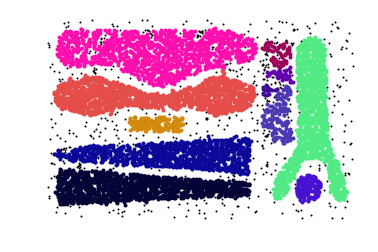

In [1]:
%matplotlib inline

import numpy as np
import benchmarks
import cutESC as cut

data = np.loadtxt(fname='../data/t8.8k.txt', delimiter=',')
X, labels_true = data[:, [0, 1]], data[:, 2]

labels_pred, comps = cut.cutESC(X, allow_outliers=True, verbose=True)
results = benchmarks.benchmarks(X, labels_true, labels_pred, verbose=True)
plt = benchmarks.draw_clusters(X, labels_pred)

# of number edges:  1175


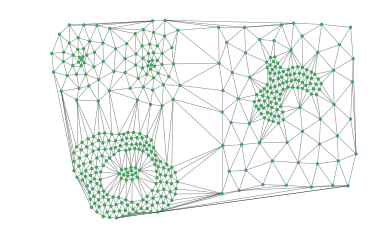

In [2]:
data = np.loadtxt(fname='../data/compound.txt', delimiter=',')
X, labels_true = data[:, [0, 1]], data[:, 2]

G = cut.build_graph(X)
print('# of number edges: ', G.number_of_edges())
labels, _ = cut.find_components(G)
plt = benchmarks.draw_network(G, X, labels)

# of number edges:  980


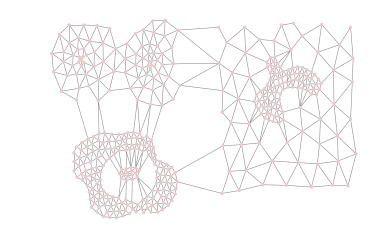

In [3]:
cut.compute_gabriel(G)
print('# of number edges: ', G.number_of_edges())
labels, _ = cut.find_components(G)
plt = benchmarks.draw_network(G, X, labels)

# of number edges:  767


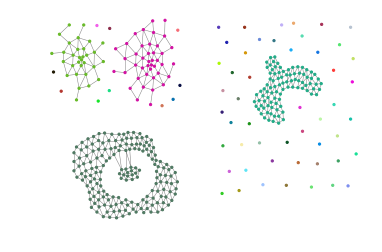

In [4]:
cut.global_edges(G)
print('# of number edges: ', G.number_of_edges())
labels, _ = cut.find_components(G)
plt = benchmarks.draw_network(G, X, labels)

# of number edges:  748


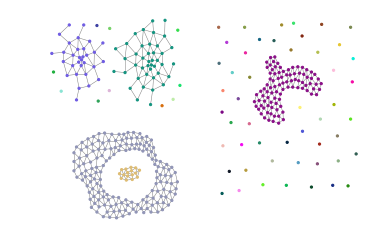

In [5]:
cut.local_edges(G)
print('# of number edges: ', G.number_of_edges())
labels, _ = cut.find_components(G)
plt = benchmarks.draw_network(G, X, labels)

# of number edges:  746


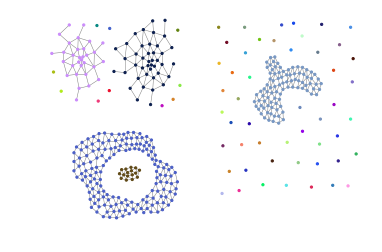

In [6]:
cut.local_inner_edges(G)
print('# of number edges: ', G.number_of_edges())
labels, _ = cut.find_components(G)
plt = benchmarks.draw_network(G, X, labels)

********************************************************************************
Silhouette Coefficient	Dunn Index	Calinski Harabaz
0.143			0.037			304.000
Dice	Jaccard	Precision	Recall
0.976	0.953	0.971		0.980
Fowlkes Mallows	Adjusted Rand Index	Adjusted Mutual Information
0.976		0.968			0.937
Homogeneity	Completeness	V-measure
0.938		0.944		0.941
********************************************************************************


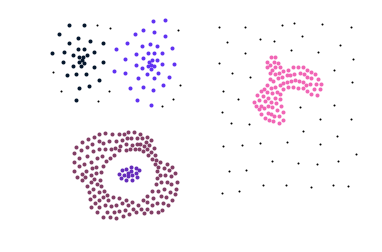

In [7]:
labels_pred, comps = cut.find_components(G, allow_outliers=True)
results = benchmarks.benchmarks(X, labels_true, labels_pred, verbose=True)
plt = benchmarks.draw_clusters(X, labels_pred)